# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Source dataset: https://www.kaggle.com/datasets/ealaxi/paysim1

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset /Customer_Analysis/PS_20174392719_1491204439457_log.csv")
print('Shape: ',df.shape)
df.head()

Shape:  (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Seem likes dataset has been preprocessed. Its kinda clear

# Explotary Data Analysis

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df_pivot=pd.pivot_table(df,index=["type"],
                               values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient 
cm = sns.light_palette("green", as_cmap=True)
df_pivot.style.background_gradient(cmap=cm)

<AxesSubplot:>

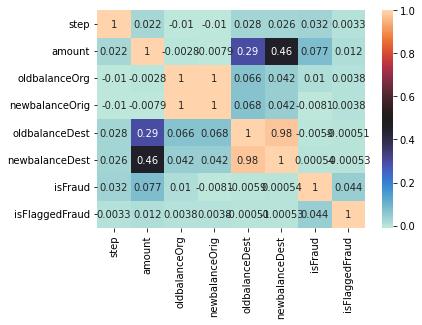

In [8]:
sns.heatmap(df.corr(), annot = True, cmap= 'icefire')

 From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds (amount 200k transactions) being triggered.

In [9]:
print('isFraud counts:\n',df['isFraud'].value_counts())
print('isFlaggedFraud counts:\n',df['isFlaggedFraud'].value_counts())

isFraud counts:
 0    6354407
1       8213
Name: isFraud, dtype: int64
isFlaggedFraud counts:
 0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


Look at this skewed show that how dataset imbalanced is =))

No Frauds 99.87 % of the dataset
Frauds 0.13 % of the dataset


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


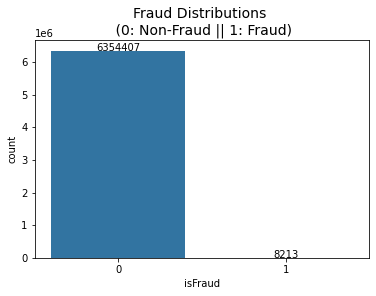

In [11]:
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

sns.countplot('isFraud', data=df)
plt.title('Fraud Distributions \n (0: Non-Fraud || 1: Fraud)', fontsize=14)
value_counts = df['isFraud'].value_counts()

# Iterate over the value counts and add them to the plot
for i, count in enumerate(value_counts):
    plt.text(i, count+100, count, ha='center')  

plt.show()

The original dataset is imbalanced between Fraud and non-Fraud, most of them are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are non-fraud.

## FlaggedFraud

Now let see whether which type have only 16 FlaggedFraud in 6 milion transactions =))

In [12]:
print('The types of flagged fraudulent transactions are {}'.format(list(df.loc[df['isFlaggedFraud'] == 1].type.drop_duplicates().values)))

The types of flagged fraudulent transactions are ['TRANSFER']


In [13]:
print('The number of flagged fraudulent TRANSFER = {}'.format(len(df.loc[(df['isFlaggedFraud'] == 1) & (df['type'] == 'TRANSFER')])))

The number of flagged fraudulent TRANSFER = 16


In [14]:
flagged = df.loc[df["isFlaggedFraud"] == 1] #observation
flagged_correctly = sum(flagged["isFraud"] == 1) #number of transactions is actual fraud and flagged
flagged_wrongly = len(flagged) - flagged_correctly
print(flagged_correctly,"observations were flagged correctly and", flagged_wrongly, \
      "observations were flagged wrongly for a total of", len(flagged), "flagged observations.")

# how many observations where the transaction is fraudulent, the transaction is a transfer
# and the amount is greater than 200.000 are in the dataset
should_be_flagged = df.loc[df["isFraud"] == 1][(df.loc[df["isFraud"] == 1]["amount"] > 200000) & (df.loc[df["isFraud"] == 1]["type"] == "TRANSFER")]
print("number of observations that should be flagged: ",len(should_be_flagged))

16 observations were flagged correctly and 0 observations were flagged wrongly for a total of 16 flagged observations.
number of observations that should be flagged:  2740


In [15]:
dfTransfer = df.loc[df["type"] == 'TRANSFER']
dfFlagged = df.loc[df["isFlaggedFraud"] == 1]
dfNotFlagged = df.loc[df["isFlaggedFraud"] == 0]

print('Min amount transacted when isFlaggedFraud is set = {}'.format(dfFlagged["amount"].min()))

print('Max amount transacted in a TRANSFER where isFlaggedFraud is not set =\
 {}'.format(dfTransfer.loc[dfTransfer["isFlaggedFraud"] == 0]["amount"].max()))

Min amount transacted when isFlaggedFraud is set = 353874.22
Max amount transacted in a TRANSFER where isFlaggedFraud is not set = 92445516.64


In [16]:
print('Have originators of transactions flagged as fraud transacted more than once? {}'\
.format((dfFlagged["nameOrig"].isin(pd.concat([dfNotFlagged["nameOrig"], dfNotFlagged["nameDest"]]))).any()))

print('Have destinations for transactions flagged as fraud initiated other transactions? \
{}'.format((dfFlagged["nameDest"].isin(dfNotFlagged["nameOrig"])).any()))
# Since only 2 destination accounts of 16 that have 'isFlaggedFraud' set have been destination accounts more than once,
# Clearly 'isFlaggedFraud' being set is independent of whether a destination account has been used before or not

print('How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: {}'\
.format(sum(dfFlagged["nameDest"].isin(dfNotFlagged["nameDest"])))) 

Have originators of transactions flagged as fraud transacted more than once? False
Have destinations for transactions flagged as fraud initiated other transactions? False
How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: 2


In a modified dataset with more than 2 million observations, a variable that brings attention to only 16 observations is insignificant.

Furthermore, the number of transactions that should have been flagged(16) far exceeds the number of observations that were actually flagged(2740).

For that reason, I am omitting the isFlaggedFraud column from the analysis.

## Account type

One feature of the dataset that is not immediately presented on the kaggle overview page is the account types "C" (customer) and "M" (Merchant), which would be the first character for each value under nameOrig and nameDest. Could this be a predictor?

In [17]:
data_account = df.copy() # creating copy of dataset in case I need original dataset
data_account["type1"] = np.nan # initializing feature column

# filling feature column
data_account.loc[df["nameOrig"].str.contains('C') & df["nameDest"].str.contains('C'),"type1"] = "CC" 
data_account.loc[df["nameOrig"].str.contains('C') & df["nameDest"].str.contains('M'),"type1"] = "CM"
data_account.loc[df["nameOrig"].str.contains('M') & df["nameDest"].str.contains('C'),"type1"] = "MC"
data_account.loc[df["nameOrig"].str.contains('M') & df["nameDest"].str.contains('M'),"type1"] = "MM"

In [18]:
# seeing the counts of transactions by type1 (CC,CM,MC,MM)
type_account = data_account['type1'].value_counts()
fraud_type_account = data_account[data_account["isFraud"] == 1]["type1"].value_counts()
non_fraud_type_account = data_account[data_account["isFraud"] == 0]["type1"].value_counts()

print("Account types count: \n", type_account)
print("\nFraud transactions by type1: \n", fraud_type_account)
print("\nValid transactions by type1: \n", non_fraud_type_account)

Account types count: 
 CC    4211125
CM    2151495
Name: type1, dtype: int64

Fraud transactions by type1: 
 CC    8213
Name: type1, dtype: int64

Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: type1, dtype: int64


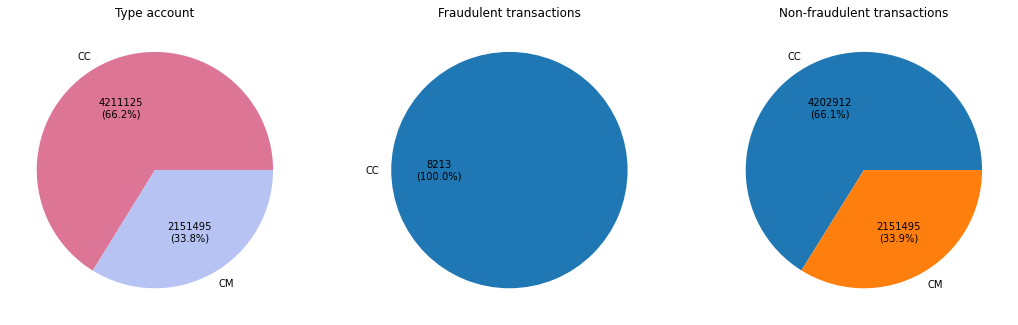

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18,10))

# add count values to autopct string
fraud_autopct = lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(fraud_type_account.values)/100, p)
non_fraud_autopct = lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(non_fraud_type_account.values)/100, p)
type_account_autpct = lambda p:'{:.0f}\n({:.1f}%)'.format(p * sum(type_account.values)/100, p)

ax[0].pie(type_account.values, labels = type_account.index, autopct = type_account_autpct, colors = ['#DD7596', '#B7C3F3'])
ax[0].set_title('Type account')

ax[1].pie(fraud_type_account.values, labels=fraud_type_account.index, autopct=fraud_autopct)
ax[1].set_title('Fraudulent transactions')

ax[2].pie(non_fraud_type_account.values, labels=non_fraud_type_account.index, autopct=non_fraud_autopct)
ax[2].set_title('Non-fraudulent transactions')

plt.show()

From the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer). I will assume that fraudulent transaction only occur when transaction type1 is CC.

However, since all relevant observations have type1 = "CC", the type1 column is no longer necessary.

## Transaction type

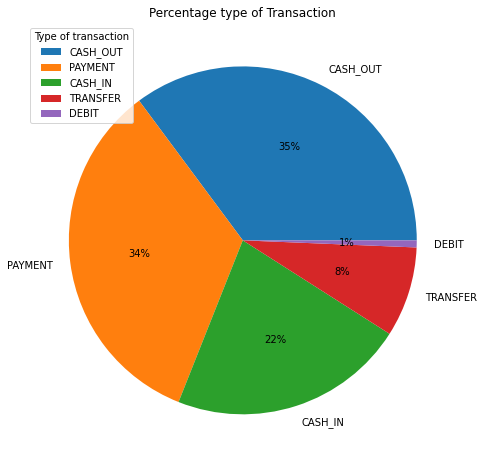

In [20]:
type_transaction = df['type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(type_transaction.values, labels=type_transaction.index, autopct='%1.0f%%')
plt.title('Percentage type of Transaction')
plt.legend(loc='upper left', title = 'Type of transaction')
plt.show()

In [21]:
print('The types of fraudulent transactions are {}'.format(list(df.loc[df['isFraud'] == 1]["type"].drop_duplicates().values))) 

The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [22]:
dfFraudTransfer = df.loc[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]
dfFraudCashout = df.loc[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]

print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


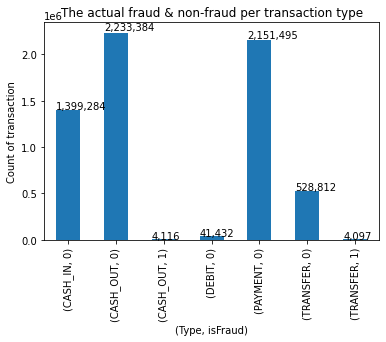

In [23]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("The actual fraud & non-fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

It seem likes only TRANSFER and CASH_OUT transaction approximately have the same number of Fraud

## Looking balances before and after the transaction

Whether account labels common to fraudulent TRANSFERs and CASH_OUTs?


In [24]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print('Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? {}'\
      .format((dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig)).any())) 

dfNotFraud = df.loc[df.isFraud == 0]

Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


In [25]:
print('\nFraudulent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs: \n\n{}'\
      .format(dfFraudTransfer.loc[dfFraudTransfer.nameDest.\
                                  isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


Fraudulent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs: 

         step      type      amount     nameOrig  oldbalanceOrg  \
1030443    65  TRANSFER  1282971.57  C1175896731     1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649      214793.32   
6362556   738  TRANSFER   814689.88  C2029041842      814689.88   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [26]:
print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = {}'\
      .format(dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == 'C423543548')].step.values)) # 185

print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = {}'\
      .format(dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == 'C1714931087')].step.values)) # 185

print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = {}'\
      .format(dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == 'C1023330867')].step.values)) # 185


Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [185]

Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [546]

Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [132]


Noting from the nameOrig and nameDest features neither encode merchant accounts in the expected way, below, we drop these features from the data since they are meaningless.

## Time step (Hour) and Amount transactions

In [27]:
df_Fraud = df.loc[df["isFraud"] == 1]
df_Valid = df.loc[df["isFraud"] == 0]

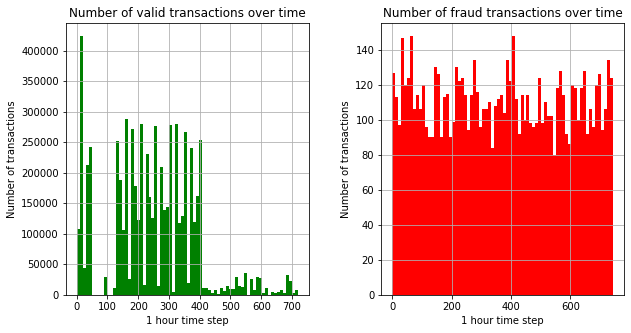

In [28]:
bins = round(744 / 10) #I take total step per 10, its equivalent each 10 hours per column

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot histogram for valid transactions
df_Valid.hist(column="step", color="green", bins=bins, ax=axs[0])
axs[0].set_xlabel("1 hour time step")
axs[0].set_ylabel("Number of transactions")
axs[0].set_title("Number of valid transactions over time")

# plot histogram for fraud transactions
df_Fraud.hist(column="step", color="red", bins=bins, ax=axs[1])
axs[1].set_xlabel("1 hour time step")
axs[1].set_ylabel("Number of transactions")
axs[1].set_title("Number of fraud transactions over time")

plt.show()

There are stark difference between the step data between valid and fraud transactions.

A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th hours.
The frequency at which fraudulent transactions occur does not seem to change much over time.

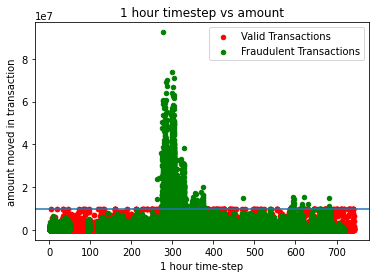

Proportion of transactions where the amount moved is greater than 10 million:  0.00038396132410862193


In [29]:
# plotting overlayed step vs amount scatter plots
fig,ax = plt.subplots()
df_Fraud.plot.scatter(x="step",y="amount",color="red",ax=ax,label="Valid Transactions")
df_Valid.plot.scatter(x="step",y="amount",color="green",ax=ax, label="Fraudulent Transactions")

plt.title("1 hour timestep vs amount")
plt.xlabel("1 hour time-step")
plt.ylabel("amount moved in transaction")
plt.legend(loc="upper right")

# plotting a horizontal line to show where valid transactions behave very differently from fraud transactions
plt.axhline(y=1e7)
plt.show()

print("Proportion of transactions where the amount moved is greater than 10 million: ", \
      len(df[df.amount > 1e7])/len(df))

Only valid transaction involved amounts larger than 10,000,000, however these transactions make up less than 0.01% of the relevant data.

When the amounts moved is less than 10,000,000 there doesn't seem to be a large difference fraudulent and valid transactions.

# Preprocess

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

from sklearn import metrics

In [106]:
df1 = df.copy()
df1 = df1.drop(["isFlaggedFraud",'nameOrig','nameDest'], axis = 1) # drop meaningless features from data
df1 = df1.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT'])),:] # take sample have fraud transactions

In [107]:
# enconding TRANSFER and CASH_OUT by int number, its like hot-encoding
df1 = pd.get_dummies(df1,prefix=['type']) 

In [108]:
print(df1.shape)
df1.head()

(2770409, 9)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,1


In [109]:
df1["isFraud"].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [110]:
X = df1.drop("isFraud",1)
Y = df1["isFraud"]

<ipython-input-110-23b139a65bf4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df1.drop("isFraud",1)


## Undersampling

Deal with Imbalanced data: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets#notebook-container

In [111]:
 # I set strategy = 1 to pick same sample X and Y
 rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
 # If you wanna experiment how performance machine learning model 
 # effected by imbalanced data you can set sampling_strategy < 1

In [112]:
X, Y = rus.fit_resample(X, Y)

In [113]:
Y.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

## Split data 

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13140, 8), (3286, 8), (13140,), (3286,))

## Standardization

In [115]:
scaler = StandardScaler()
scaler.fit(X_train)
                            
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning 

In [116]:
print('Skew Fraud transactions vs total transactions = {}'.format( len(Y.loc[Y == 1]) / float(len(X)) ))

Skew Fraud transactions vs total transactions = 0.5


## Logistic Regression

In [117]:
LGR = LogisticRegression().fit(X_train,Y_train)

Y_pred_LGR = LGR.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1649
           1       0.94      0.87      0.90      1637

    accuracy                           0.91      3286
   macro avg       0.91      0.91      0.91      3286
weighted avg       0.91      0.91      0.91      3286



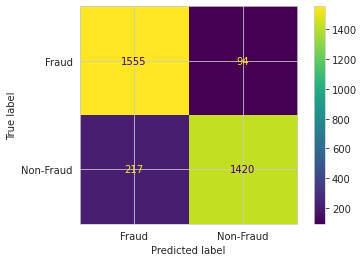

In [118]:
report = metrics.classification_report(Y_test, Y_pred_LGR)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_LGR)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

## Bernouli Naive Bayes

In [119]:
BNBayes = BernoulliNB().fit(X_train, Y_train)

Y_pred_BNB = BNBayes.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1649
           1       0.81      0.68      0.74      1637

    accuracy                           0.76      3286
   macro avg       0.77      0.76      0.76      3286
weighted avg       0.77      0.76      0.76      3286



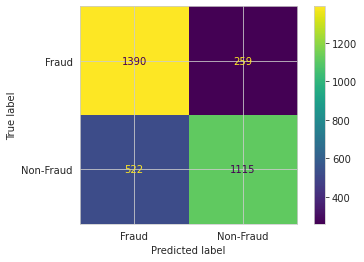

In [120]:
report = metrics.classification_report(Y_test, Y_pred_BNB)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_BNB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

## Suport Vector Machine


In [121]:
SVM = LinearSVC().fit(X_train, Y_train)

Y_pred_SVM = SVM.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1649
           1       0.94      0.88      0.91      1637

    accuracy                           0.91      3286
   macro avg       0.91      0.91      0.91      3286
weighted avg       0.91      0.91      0.91      3286



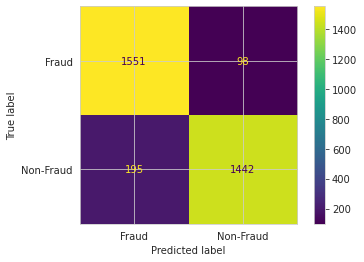

In [122]:
report = metrics.classification_report(Y_test, Y_pred_SVM)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_SVM)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

## K-Nearest Neighbors

In [123]:
KNN = KNeighborsClassifier().fit(X_train, Y_train)

Y_pred_KNN = KNN.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1649
           1       0.94      0.92      0.93      1637

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286



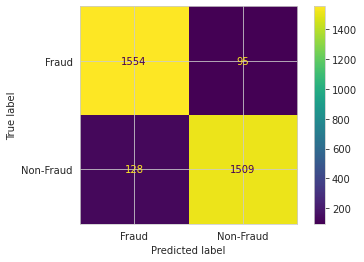

In [124]:
report = metrics.classification_report(Y_test, Y_pred_KNN)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_KNN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

## Extreme Gradient Boosting

In [144]:
XGB = XGBClassifier(max_depth = 3,  n_jobs = 4, random_state=42).fit(X_train, Y_train)

Y_pred_XGB = XGB.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



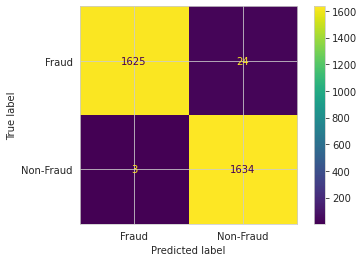

In [145]:
report = metrics.classification_report(Y_test, Y_pred_XGB)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_XGB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

## Multi Layer Perceptron

In [131]:
from sklearn.neural_network import MLPClassifier

In [132]:
ncols = len(X.columns)
hidden_layers = (ncols,ncols,ncols)
max_iter = 1000
print(hidden_layers)

(8, 8, 8)


In [133]:
MLP = MLPClassifier(hidden_layer_sizes=hidden_layers,max_iter=1000,random_state=42)

# training model
MLP.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1000, random_state=42)

In [134]:
# evaluating model on how it performs on balanced datasets
predictionsMLP = MLP.predict(X_test)
CM_MLP = metrics.confusion_matrix(Y_test,predictionsMLP)
CR_MLP = metrics.classification_report(Y_test,predictionsMLP)
fprMLP, recallMLP, thresholdsMLP = metrics.roc_curve(Y_test, predictionsMLP)
AUC_MLP = metrics.auc(fprMLP, recallMLP)
    
resultsMLP = {"Confusion Matrix":CM_MLP,"Classification Report":CR_MLP,"Area Under Curve":AUC_MLP}

In [135]:
# showing results from Multilayered perceptrons developed from each dataset
for measure in resultsMLP:
    print(measure,": \n",resultsMLP[measure])

Confusion Matrix : 
 [[1628   21]
 [  44 1593]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1649
           1       0.99      0.97      0.98      1637

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

Area Under Curve : 
 0.9801932864663541


# Evaluation

## Performance Comparision

In [136]:
AUPRC_LGR = metrics.average_precision_score(Y_test, Y_pred_LGR)
AUPRC_SVM = metrics.average_precision_score(Y_test, Y_pred_SVM)
AUPRC_BNB = metrics.average_precision_score(Y_test, Y_pred_BNB)
AUPRC_KNN = metrics.average_precision_score(Y_test, Y_pred_KNN)
AUPRC_XGB = metrics.average_precision_score(Y_test, Y_pred_XGB)

model_name = ["LogisticsR","SVM","BernouliNB","KNN","XGBoost"]
AUPRC_score = [AUPRC_LGR, AUPRC_SVM, AUPRC_BNB, AUPRC_KNN, AUPRC_XGB]

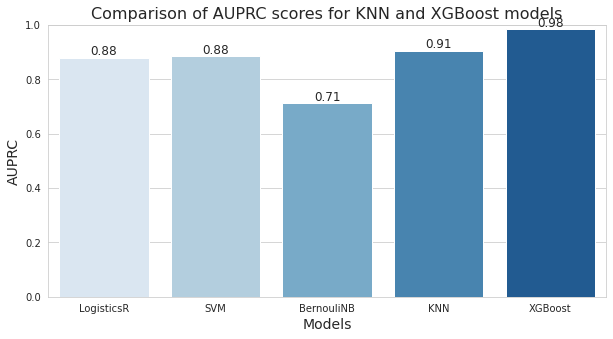

In [137]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
ax = sns.barplot(x=model_name, y=AUPRC_score, palette="Blues")

# set the y-axis limit to 1.0
ax.set_ylim(0, 1.0)

# add text labels to the bars
for i, score in enumerate(AUPRC_score):
    ax.text(i, score+0.01, round(score, 2), ha='center', fontsize=12)

# set the plot title and axis labels
ax.set_title('Comparison of AUPRC scores for models', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('AUPRC', fontsize=14)

# show the plot
plt.show()

We thoroughly interrogated the data at the outset to gain insight into which features could be discarded and those which could be valuably engineered. The plots provided visual confirmation that the data could be indeed be discriminated with the aid of the new features. To deal with the large skew in the data, we chose an appropriate metric and used an ML algorithm based on an ensemble of decision trees which works best with strongly imbalanced classes. The method used in this kernel should therefore be broadly applicable to a range of such problems

## XGB evaluation

In [155]:
X.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_OUT', 'type_TRANSFER'],
      dtype='object')

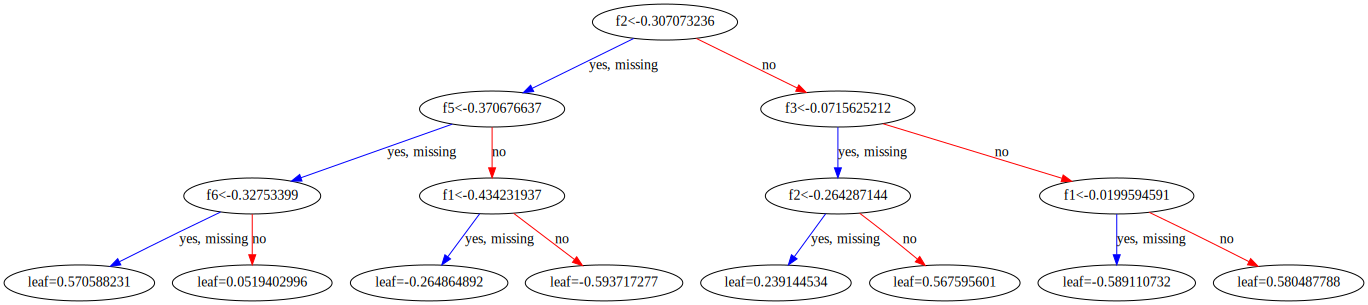

In [157]:
to_graphviz(XGB)

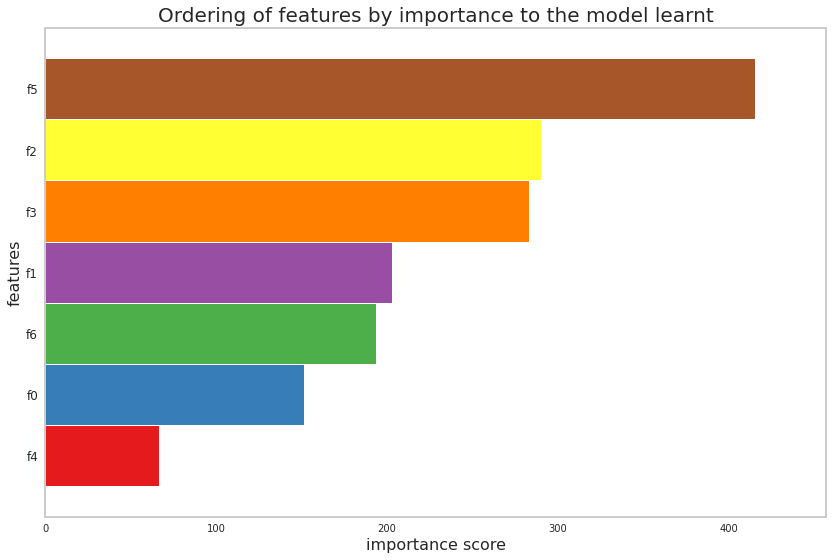

In [ ]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(XGB, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [ ]:
%%time
from sklearn.model_selection import learning_curve    
trainSizes, trainScores, crossValScores = learning_curve(\
                              XGBClassifier(max_depth = 3, n_jobs = 4), X_train, Y_train, scoring = 'average_precision')

CPU times: user 13.1 s, sys: 721 ms, total: 13.9 s
Wall time: 10.3 s


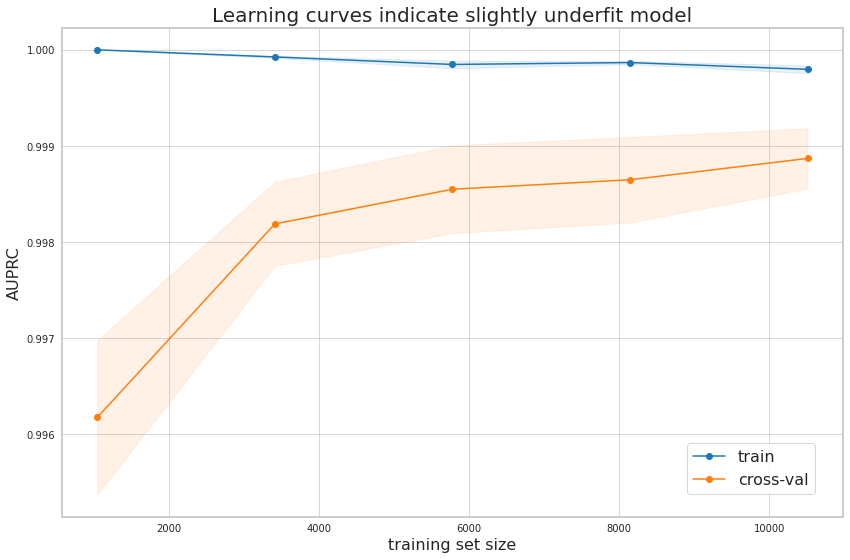

In [ ]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

# The end